In [105]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, Polygon

import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [106]:
grid = gpd.read_file('Data/maps/')


In [107]:
grid["test"] = 0
grid = grid[["TILE_NAME", "geometry"]]
grid.head()

,TILE_NAME,geometry
0,CK148,"POLYGON ((6478407 1962444, 6484407 1962444, 64..."
1,AT147,"POLYGON ((6238407 1958444, 6244407 1958444, 62..."
2,AU147,"POLYGON ((6244407 1958444, 6250407 1958444, 62..."
3,AV147,"POLYGON ((6250407 1958444, 6253471 1958444, 62..."
4,AW147,"POLYGON ((6256407 1958444, 6262407 1958444, 62..."


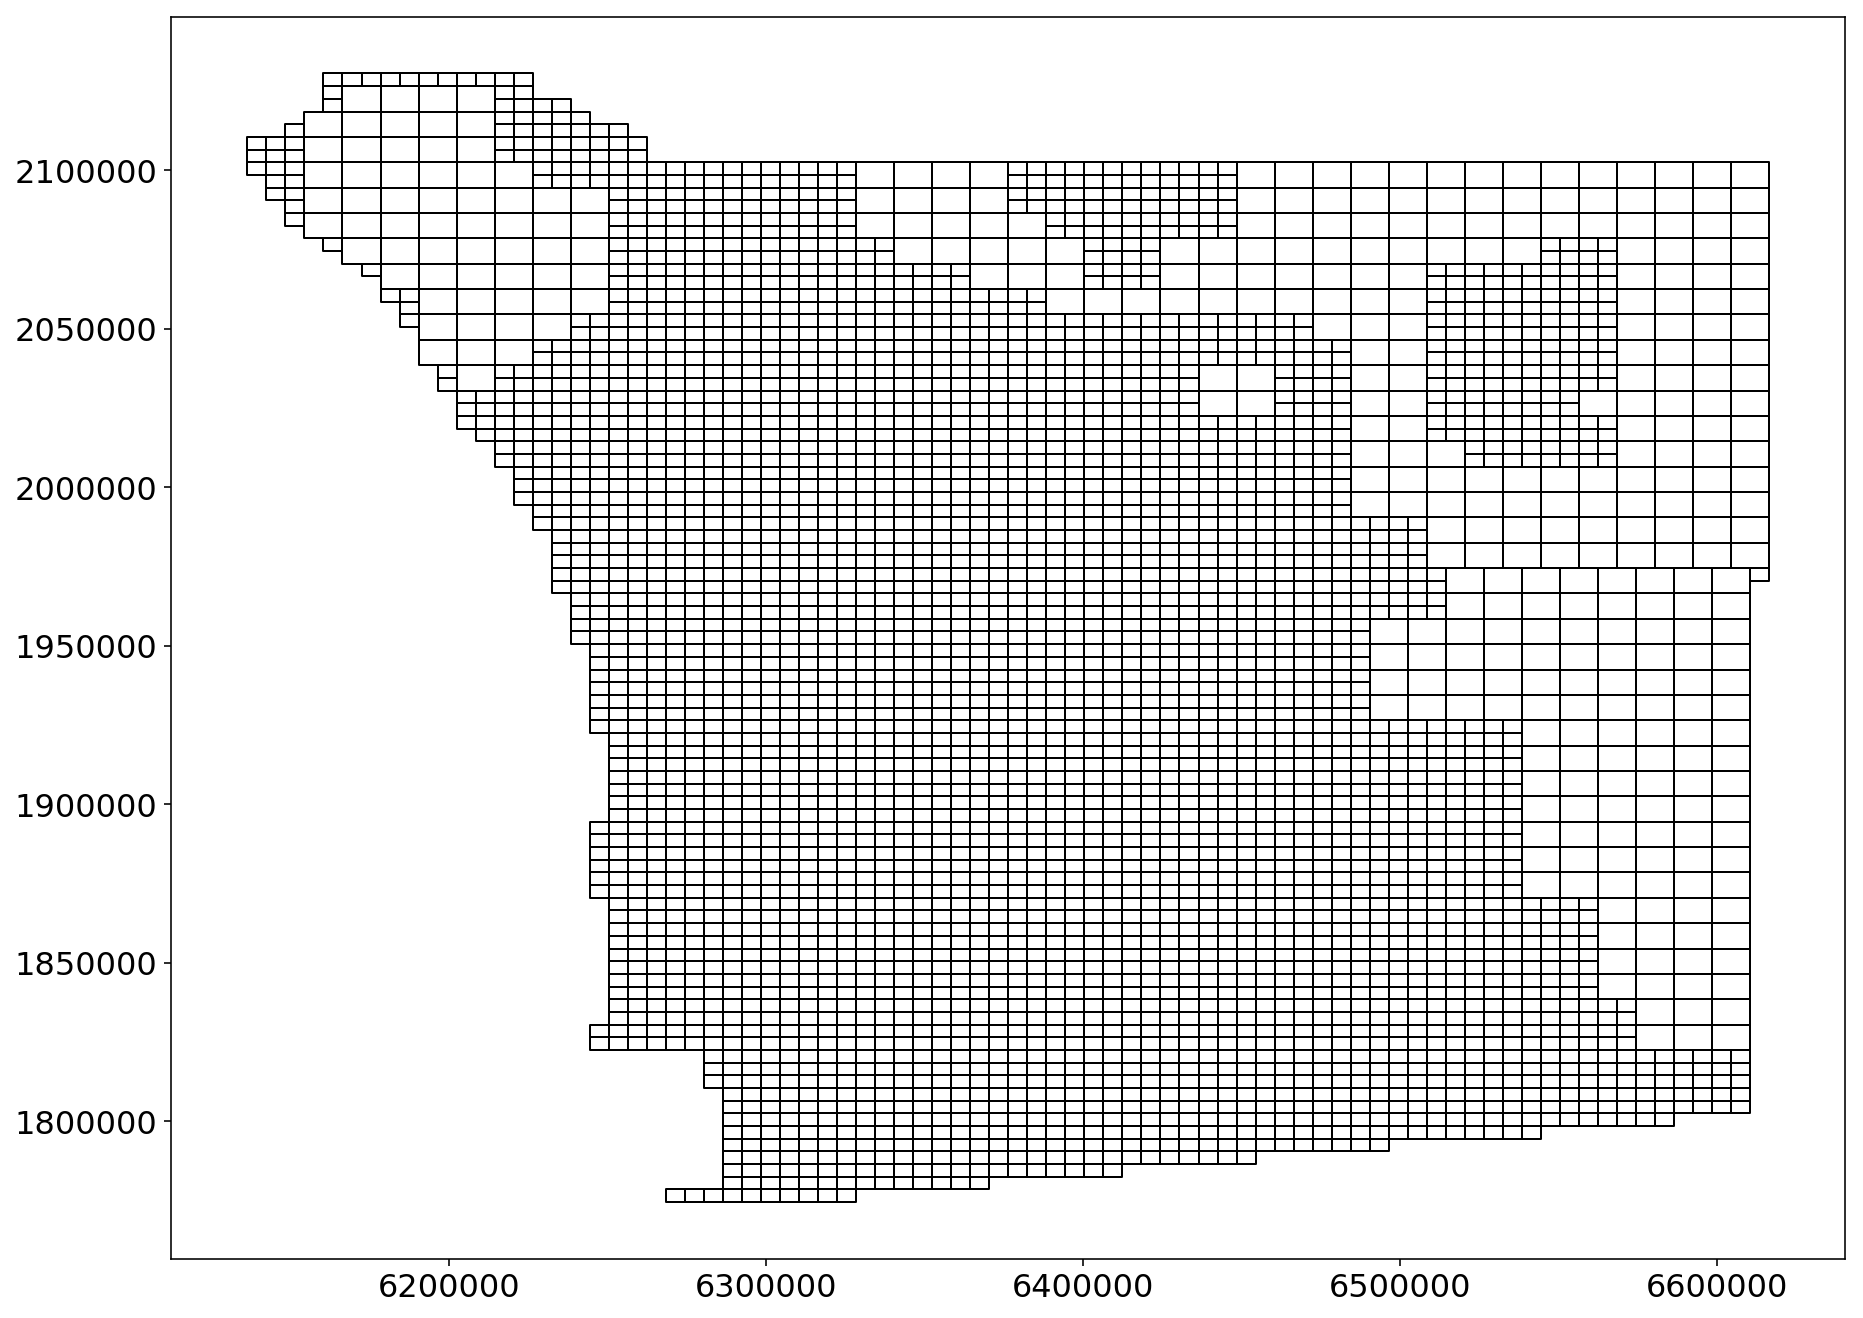

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
grid.plot(ax=ax,color="white", edgecolor='black');


In [109]:
traffic_df = pd.read_csv("traffic_crime.csv")
traffic_df = traffic_df.set_index("stop_id")

business_df = pd.read_csv("business_df.csv")

reasonable_df = pd.read_csv("reasonable_crime.csv")
reasonable_df = reasonable_df.set_index("stop_id")


reasonable_df.drop_duplicates(keep=False,inplace=True) 
traffic_df.drop_duplicates(keep=False,inplace=True) 


In [111]:
geometry = [Point(xy) for xy in zip(reasonable_df["lon"], reasonable_df["lat"])]
geometry[:3]
crime_geo_df = gpd.GeoDataFrame(reasonable_df, geometry=geometry, crs=grid.crs)



In [99]:
geometry = [Point(xy) for xy in zip(business_df["lon"], business_df["lat"])]
geometry[:3]
business_geo_df = gpd.GeoDataFrame(business_df, geometry=geometry, crs=grid.crs)


In [112]:
crime_geo_df = crime_geo_df.to_crs(grid.crs)

CRSError: no projection control parameters specified

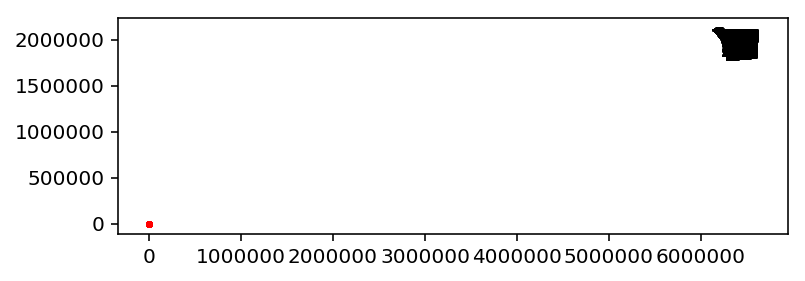

In [103]:
# combining maps
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

base = grid.plot(color='white', edgecolor='black')

crime_geo_df.plot(ax=base, marker='o', color='red', markersize=5);


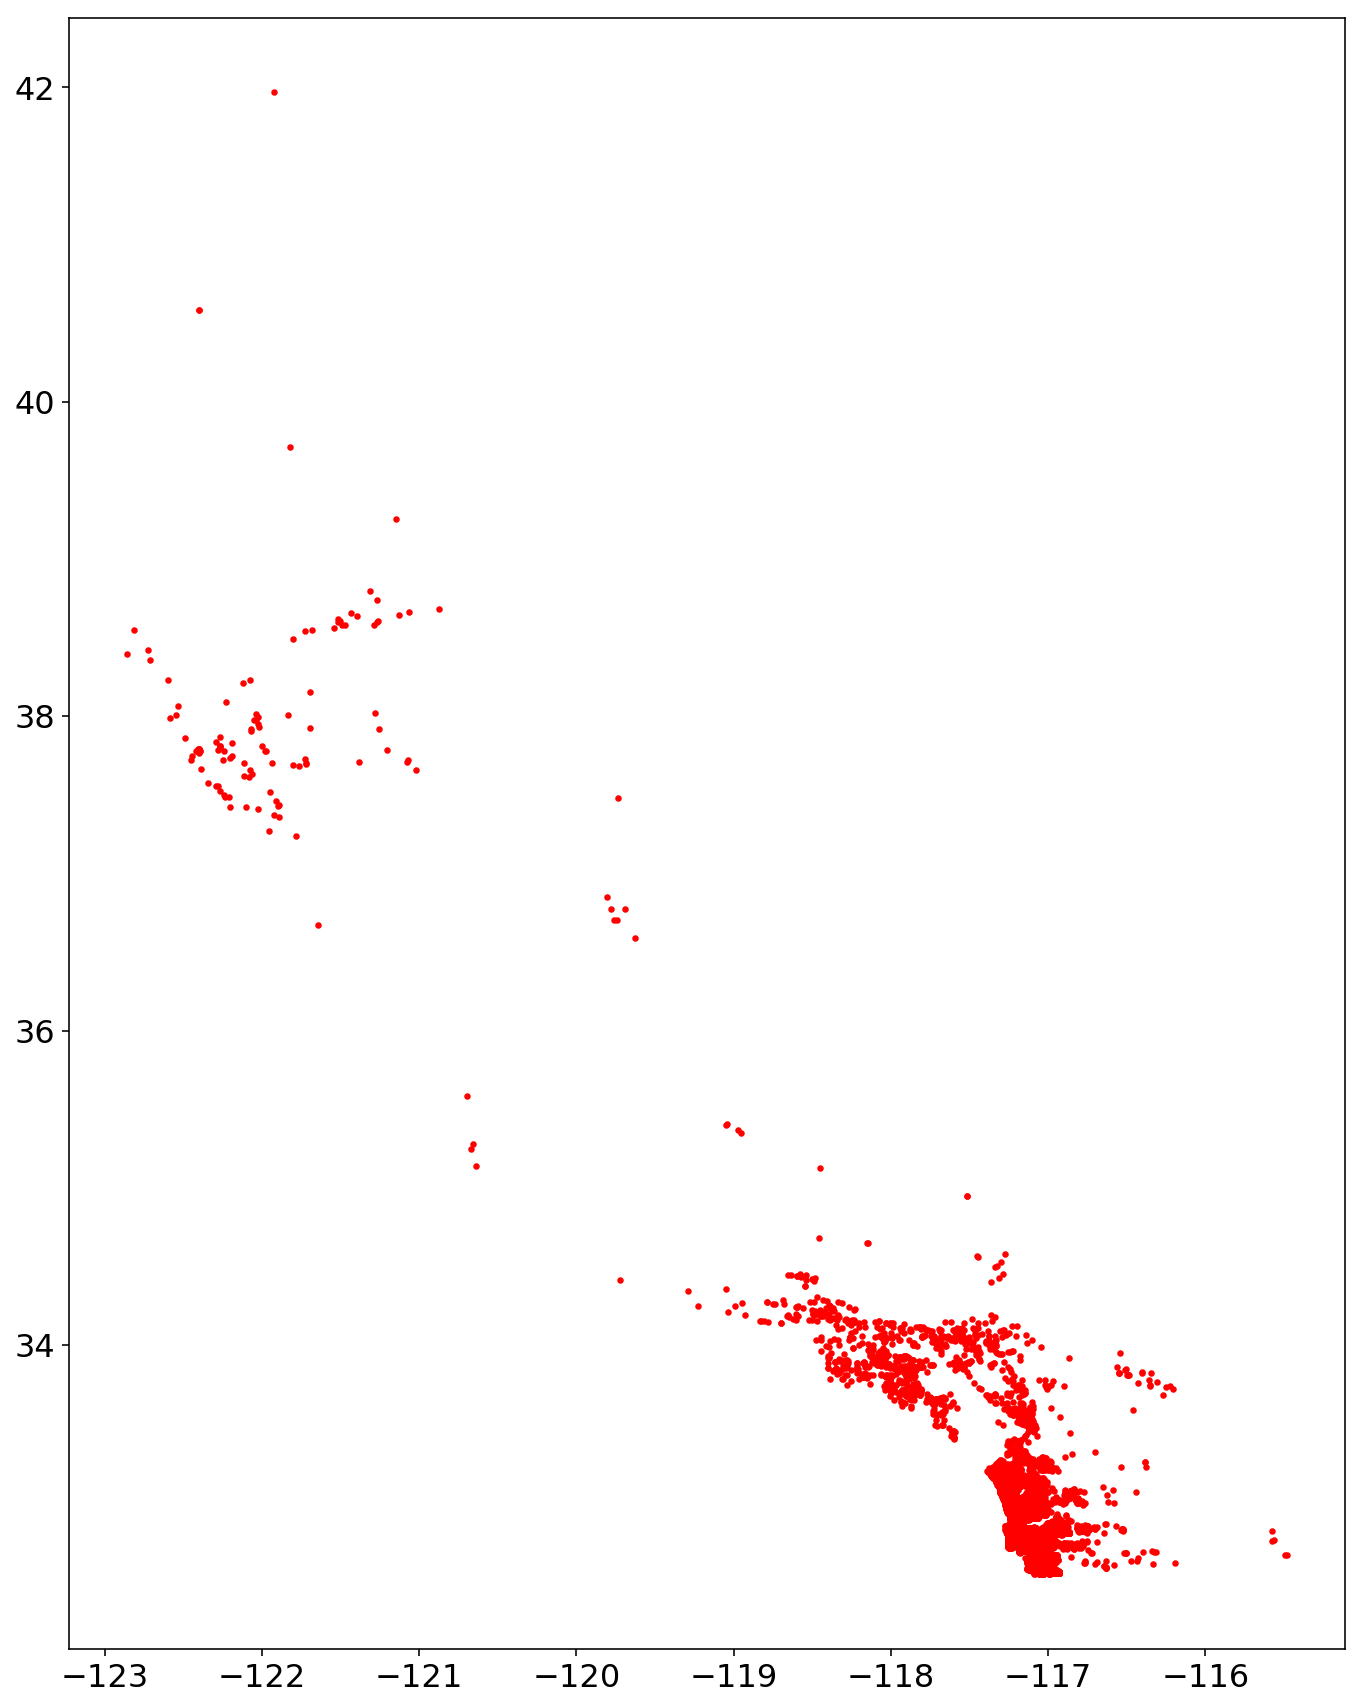

In [78]:
# combining maps
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

business_geo_df.plot(ax=ax, marker='o', color='red', markersize=5);
